<a href="https://colab.research.google.com/github/jtlee-97/Machine-Learning-with-Python/blob/main/%5B01%5D%20Perceptron_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image

# **Perceptron Algorithm**



- 1957년 Frank Rosenblatt가 제안한 초기형태의 인공 신경망으로 __다수의 입력으로부터 하나의 결과를 내보내는__ 초창기 알고리즘
- 학습 데이터가 선형적으로 분리, weight(가중치) 값을 조정


### **Perceptron Algorithm - Learning rules** (weight update)
- If the weight value is 0, it means that you predicted it correctly.

- We limit the value of the Epoch because it is an algorithm that repeats indefinitely if we don't admit a little error.





#### [ Weight update formula ]

$w_j := w_j + \Delta w_j$

$\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$

In [2]:
Image(url='https://git.io/JtIbO', width=600) 

In [3]:
Image(url='https://git.io/JtIbL', width=500) 



---


# **Implement the perceptron algorithm using Python**

In [4]:
import numpy as np

class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, thresholds=0.0):  # 학습률 0.01 / 에포크 50회 / 임계값 0.0
        self.eta = eta
        self.n_iter = n_iter
        self.thresholds = thresholds

  def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = [] 

        for _ in range(self.n_iter): 
            errors = 0
            for xi, target in zip(X, y): # xi : 특성 / target : 타깃값
                update = self.eta * (target - self.predict(xi)) # update -> n(y - yi)
                self.w_[1:] += update * xi 
                self.w_[0] += update 
                # 오류 검출
                errors += int(update != 0.0) 
            self.errors_.append(errors) 
        return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)



---


## **Perceptron test using iris data.**

#### 데이터 준비 

In [5]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
print(df)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


### **Drawing a data graph.** 
> 준비한 데이터 그래프로 확인

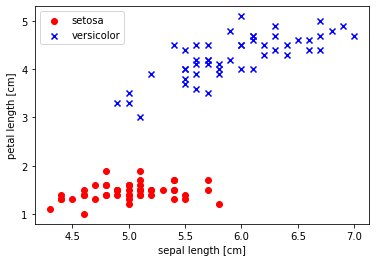

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values 
y = np.where(y == 'Iris-setosa', -1, 1) 
X = df.iloc[0:100, [0, 2]].values  

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa') 

plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left') 

plt.show()

> *코드 부가 설명*

      matplotlib.pyplot : 명령어 스타일로 동작하는 함수, 그래프를 만들고 변화를 줄 수 있음

      iris.data파일은 iris-setosa / iris-versicolor / iris-virginica가 순서대로 50개씩 들어있는 csv파일
      밑에서 100개를 불러들여 setosa와 versicolor 2개로 구분하는 이유는 순서대로 50개씩이기 때문에 virginica가 없다는 것을 알고 있기 때문.

      loc  : 사람이 읽는 라벨 값으로 접근
      iloc : 컴퓨터가 읽을 수 있는 indexing값으로 접근

      legend(범례) : 데이터 종류를 표시하기 위한 텍스트
          : loc = 위치 지정 -> 여기선 upper left로 좌측상단에 데이터 종류 표기
          : (0.5, 0.5)로 지정하거나, upper left / lower right로 지정 가능

### **Using data to train perceptron models.**

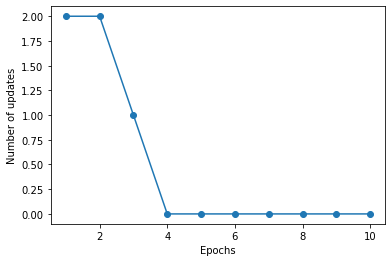

In [7]:
# 학습률 0.1 / 에포크 10회
ppn = Perceptron(eta=0.1, n_iter=10) 
ppn.fit(X, y) 

# errors(오차값) 그래프
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o') 
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

> *부가 설명*
        
        그래프를 확인해보면 총 10회의 애포크 중 y축이 0이 되는 에포크 횟수번째부터 오차가 없는 것을 확인할 수 있다.
        즉 해당 퍼셉트론은 y축이 0이 되는 에포크 횟수번째 이후 훈련 샘플을 완벽하게 분류했다는 것을 의미한다.
      


### **Check the results using the determination boundary graph.**

#### Graph Code

In [8]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid( np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution) )

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

**굵은 텍스트**> *코드 부가 설명*

      meshgrid함수 
        : 축에 해당하는 1차원 배열을 받아 벡터 공간의 모든 좌표를 담은 행렬을 반환한다.
        : 지금은 x1,x2 각각의 최소 최대 범위를 지정했으니, xx1/xx2로 모든 좌표를 반환시킨다.
        : 그에 간격을 resolution으로 했고, 이는 위에서 0.02로 지정했었다.
        : 즉 x1을 예로들면 x1_min부터 0.02간격으로 x1_max까지의 모든 좌표를 xx1에 추가한 것이다.

      
      ravel()는 다차원 배열읠 1차원으로 평평하게 펴주는 함수이다.

      .T는 전치를 의미하며, 열벡터를 행벡터로 혹은 그 반대로 바꾸는 것을 의미한다.

      reshape 함수 : 배열의 차원을 변경해주며, 기본값은 reshape(변경배열, 차원)이다.

      contourf는 등치선을 표현하는데 사용하는 함수이다.
      2가지가 있는데 contour()는 등고선만 표기하고, contourf()는 색상을 표기한다.
      [자세한 활용법: https://m31phy.tistory.com/220]


      샘플색과 배경색이 겹치는 것은 alpha를 통해 투명도를 조절했고, 샘플에는 테두리를 검은색으로 처리했다.
      



#### Result



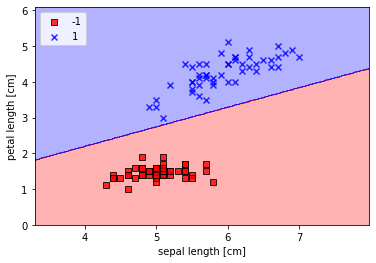

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()